In [1]:
import os
import random
import warnings


import numpy as np
import torch

warnings.filterwarnings("ignore")


def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


set_seed(seed=42)

Loaded XML file successfully
BẮT ĐẦU PHÂN TÍCH DỮ LIỆU
PHÂN TÍCH CÂN BẰNG DỮ LIỆU
Phân phối BIO tags:
   O           : 182532 tokens (81.06%)
   B-LOC       :   8982 tokens ( 3.99%)
   I-LOC       :   8689 tokens ( 3.86%)
   I-PER       :   5969 tokens ( 2.65%)
   B-PER       :   5035 tokens ( 2.24%)
   I-TME       :   3948 tokens ( 1.75%)
   I-TITLE     :   3047 tokens ( 1.35%)
   B-NUM       :   2772 tokens ( 1.23%)
   B-TITLE     :   2091 tokens ( 0.93%)
   B-TME       :   1781 tokens ( 0.79%)
   I-NUM       :    341 tokens ( 0.15%)

Phân phối loại entities (20661 entities):
   LOC         :   8982 entities (43.47%)
   PER         :   5035 entities (24.37%)
   NUM         :   2772 entities (13.42%)
   TITLE       :   2091 entities (10.12%)
   TME         :   1781 entities ( 8.62%)

Tỷ lệ cân bằng:
   - Non-entity (O): 0.811
   - Entity tokens: 0.189
   - Imbalance ratio: 4.28:1

PHÂN TÍCH ENTITY PATTERNS
Phân tích độ dài entities:
   - Trung bình: 2.06 tokens
   - Median: 2.00 token

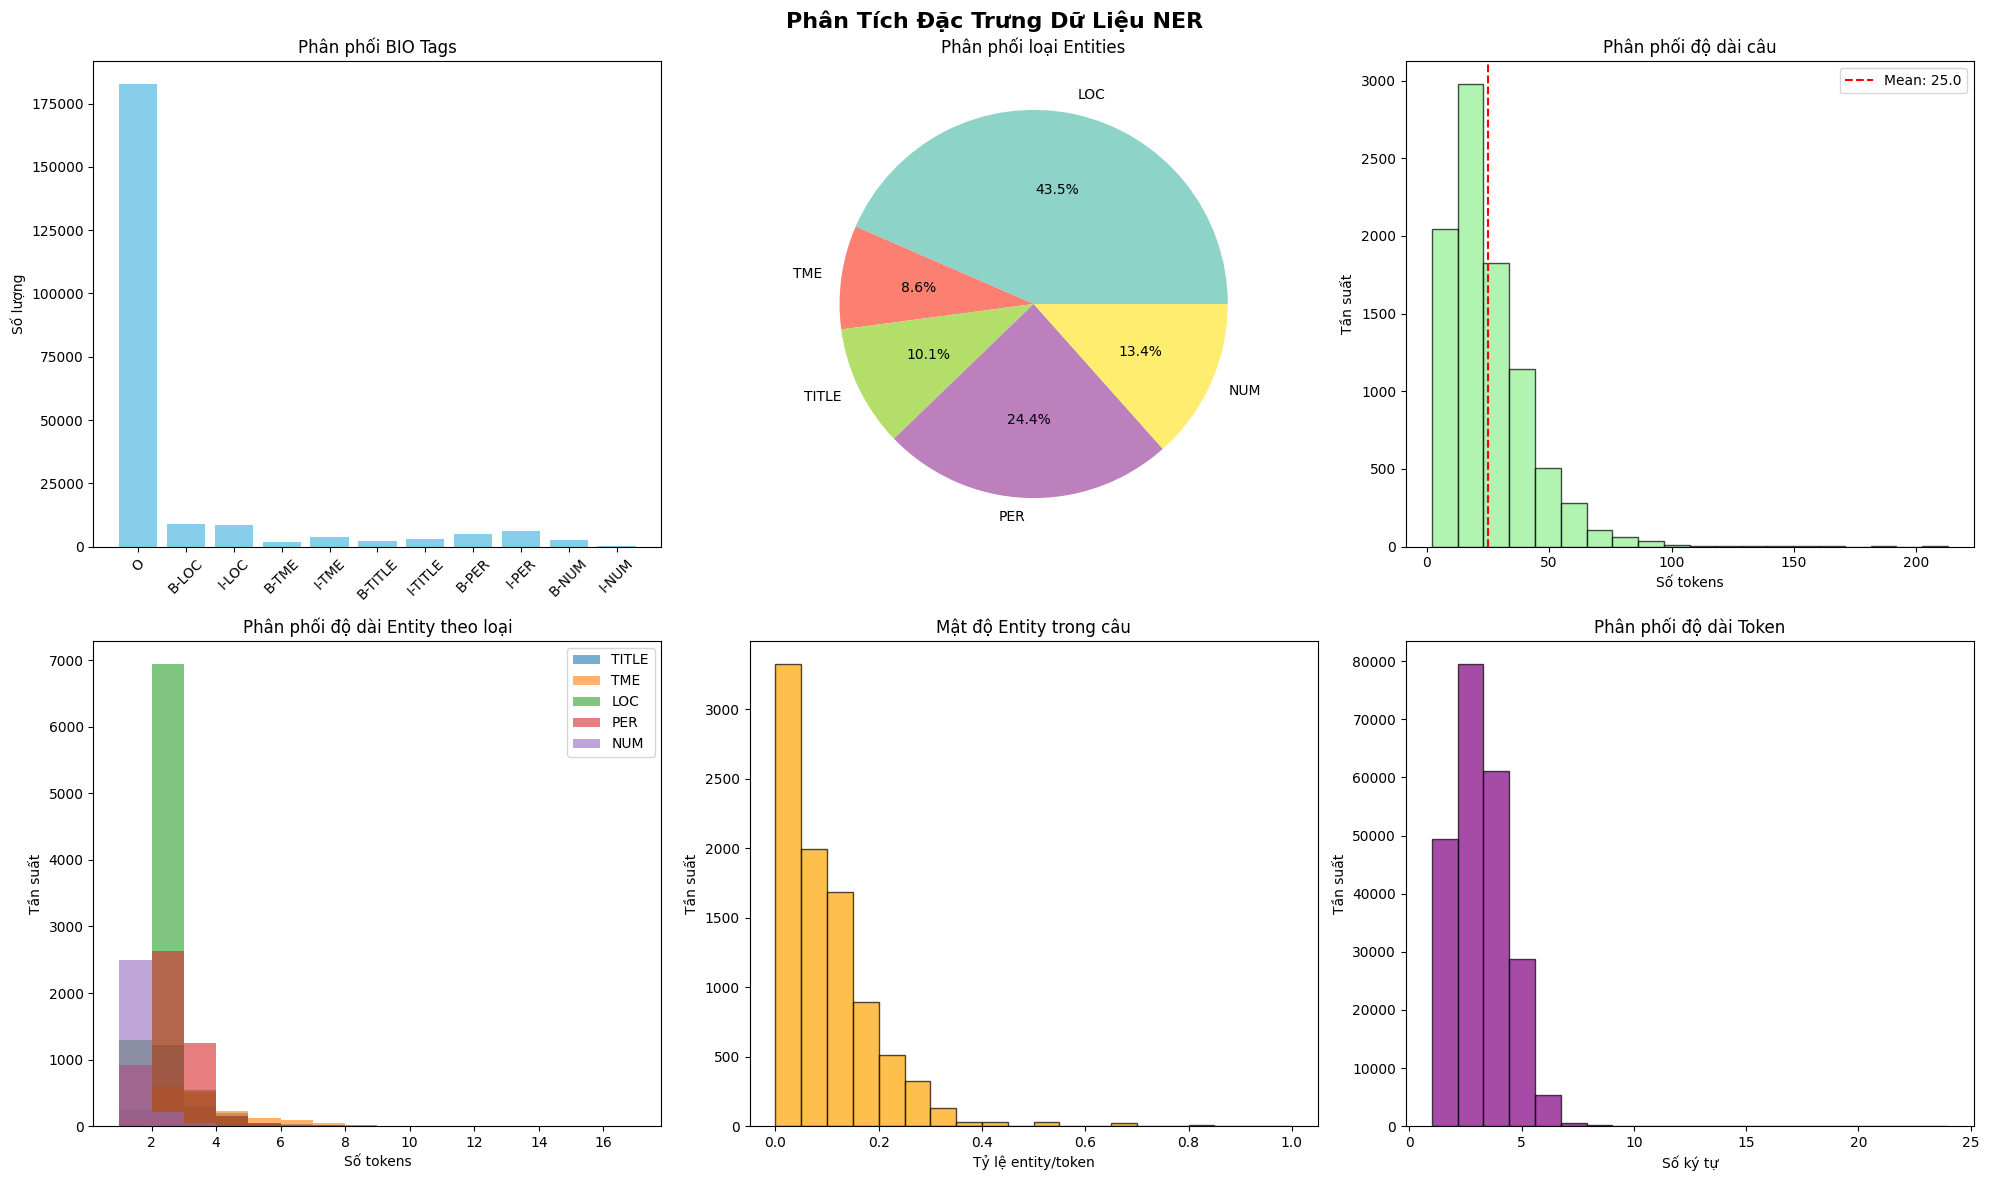

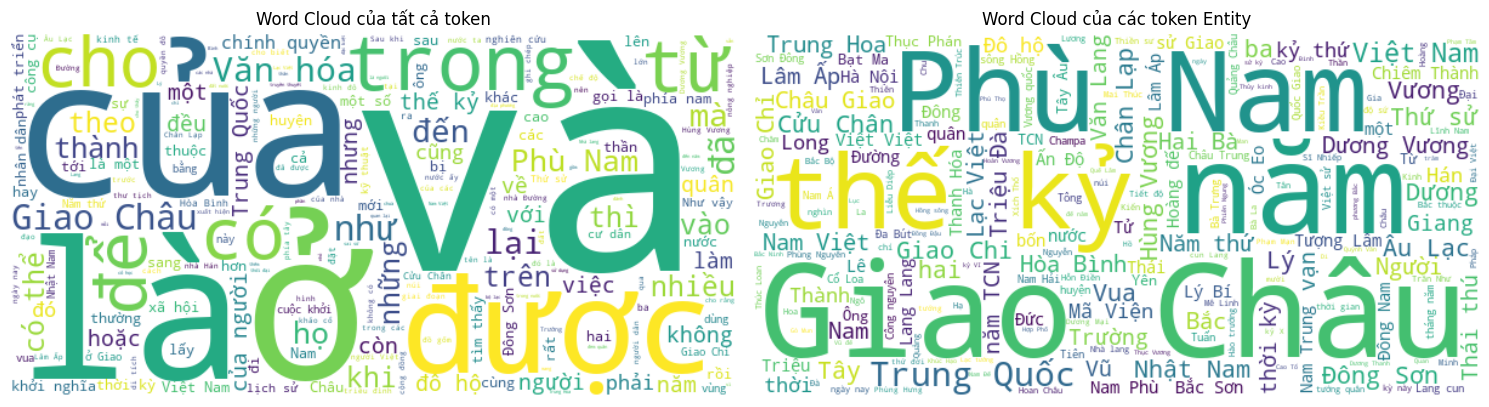


Đã export các file phân tích:
   - ner_sentences.csv: Dữ liệu câu
   - ner_tokens.csv: Dữ liệu token-level
   - ner_entities.csv: Dữ liệu entity-level


In [2]:
from data_analyzer import DataAnalyzer

xml_file_path = "./data/vietnam-history-data-ner/VietNam-History-Data-NER.xml"
output_dir = "output_data/vietnam-history-data-ner"
analyzer = DataAnalyzer(xml_file_path, output_dir)
analyzer.run_complete_ner_analysis()

In [3]:
from data_processor import DataProcessor

processor = DataProcessor(data_dir="output_data/vietnam-history-data-ner", seed=42)
processor.process_complete_pipeline(
    train_ratio=0.7,
    dev_ratio=0.1,
    test_ratio=0.2,
    output_dir="output_data/vietnam-history-data-ner/split_data",
)

BẮT ĐẦU PIPELINE XỬ LÝ DỮ LIỆU - CoNLL FORMAT
Đã load thành công file dữ liệu:
   - Sentences: 9004 câu
Đã parse các cột dạng list

Chia dữ liệu theo tỷ lệ 0.7:0.1:0.2
Hoàn thành chia dữ liệu!

THỐNG KÊ CÁC SPLIT

TRAIN SET:
   - Sentences: 6,302
   - Tokens: 157,810
   - Entities: 14,401
   - Avg sentence length: 25.04
   - Avg entities/sentence: 2.29
   - Entity distribution:
     * LOC: 6230 (43.3%)
     * PER: 3519 (24.4%)
     * NUM: 1947 (13.5%)
     * TITLE: 1468 (10.2%)
     * TME: 1237 (8.6%)

DEV SET:
   - Sentences: 900
   - Tokens: 22,637
   - Entities: 2,084
   - Avg sentence length: 25.15
   - Avg entities/sentence: 2.32
   - Entity distribution:
     * LOC: 882 (42.3%)
     * PER: 516 (24.8%)
     * NUM: 276 (13.2%)
     * TITLE: 219 (10.5%)
     * TME: 191 (9.2%)

TEST SET:
   - Sentences: 1,802
   - Tokens: 44,740
   - Entities: 4,176
   - Avg sentence length: 24.83
   - Avg entities/sentence: 2.32
   - Entity distribution:
     * LOC: 1870 (44.8%)
     * PER: 1000 (23